In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Text(0, 0.5, 'Salary')

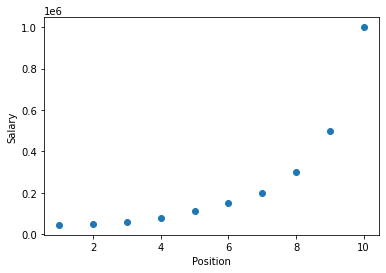

In [7]:
plt.scatter(df['Level'],df['Salary'])
plt.xlabel('Position')
plt.ylabel('Salary')

#### chart shows not linear relationship, use polynomial regression

### Transform x into n degree 

In [10]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['Level']]
y = df[['Salary']]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X) # X is 2D array

In [11]:
X_poly  # for y = b0 + b1x + b2x^2, the 2nd column is value of X, 3rd column is x^2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

### Use linear regression build model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_poly_train,X_poly_test,y_train,y_test = train_test_split(X_poly,y)

model = LinearRegression()
model.fit(X_poly_train,y_train)

LinearRegression()

In [13]:
model.score(X_poly_test,y_test)

0.25224239310134955

In [14]:
print(model.predict(X_poly_test))

[[486022.25505587]
 [ 31310.60116354]
 [702653.52294764]]


In [15]:
y_test

,Salary
7,300000
1,50000
8,500000


### visualize model prediction results

Text(0, 0.5, 'Salary')

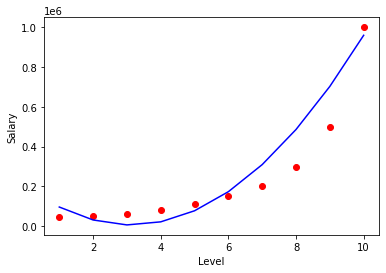

In [16]:
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X_poly),color='blue')
plt.xlabel('Level')
plt.ylabel('Salary')

### try to find the best degree to fit data

In [52]:
def diff_degree(n):
    poly_new = PolynomialFeatures(degree=n)
    X_poly_new = poly_new.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X_poly_new,y)
    model_new = LinearRegression()
    model_new.fit(X_train,y_train)
    score = model_new.score(X_test,y_test)
    print(f'With degree {n} the model score is {score}')
    
    plt.scatter(X,y,color='red')
    plt.plot(X,model_new.predict(X_poly_new))
    plt.figure(n)
    plt.title(f'degree = {n}')
    plt.xlabel('Level')
    plt.ylabel('Salary')

With degree 1 the model score is 0.2608619284009708
With degree 2 the model score is 0.7339694030838773
With degree 3 the model score is 0.7495911010592471
With degree 4 the model score is 0.9770392538207775
With degree 5 the model score is 0.9768757968232229
With degree 6 the model score is 0.9941273817731585
With degree 7 the model score is -0.9605868758986065
With degree 8 the model score is 0.9974326291886665
With degree 9 the model score is 0.9954976260666418


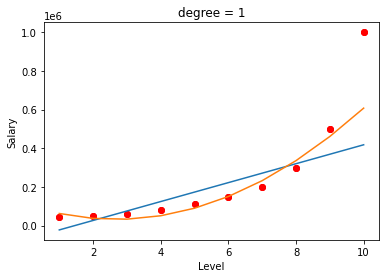

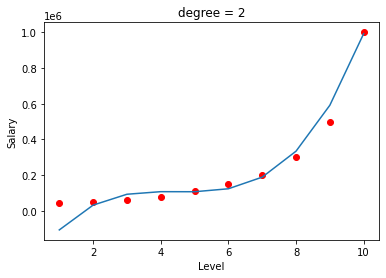

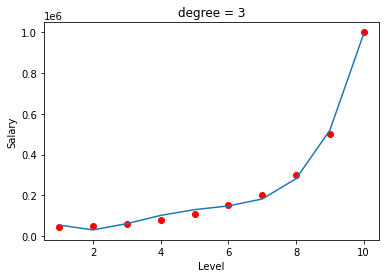

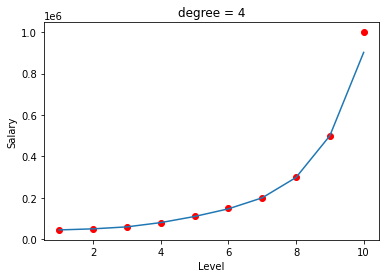

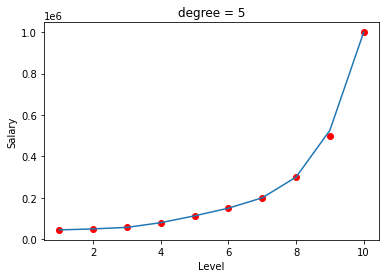

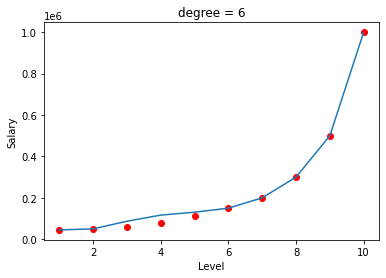

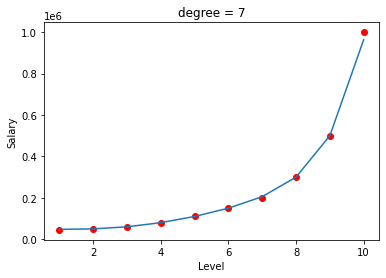

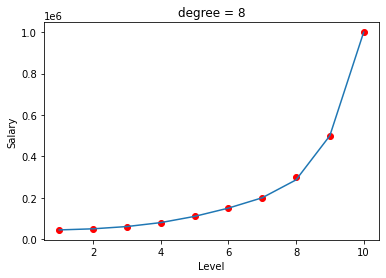

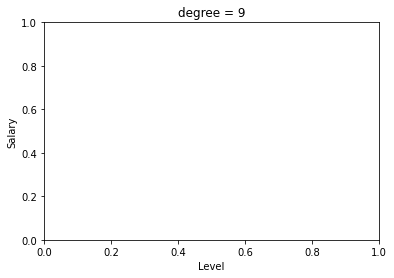

In [53]:
for n in range(1,10):
    diff_degree(n)

### degree = 4 is the best, with higher degree may cause overfit